## 数式処理システムって何
CoCalcはオープンソースの数式処理システムで、ブラウザーからcocalc.comの提供するクラウドサービスやDockerを使った仮想環境で利用することができます。

数式処理システムCoCalcと言われても、「数式システム」って何と思われる方が多いのではないでしょうか。

私たちが日常で使う電卓と比べてみましょう。電卓で以下のように入力してみます。

```
1/2+1/3=0.833333333333333
```

Macの「計算機」で実行してみます。

電卓では、計算の途中結果を二進数（bit）で行なっています。
最初に1/2の結果0.5を計算して、次に1/3の結果0.333333333333333を計算して、その和を求めます。
そして0.833333333333333の結果を返します。
<img src="images/cal.png" width="300px"/>


## CoCalcで計算
それでは、数式処理システムCoCalcで同じ計算を行なってみましょう。

In [1]:
1/2 + 1/3

5/6

数式処理システムでは5/6の分数で答えが返されました。数式処理システムでは1/2+1/3の計算を式の通り計算しています。

分数の計算は、分母を同じ値6に通分してから足し算をします。

$$
\frac{1}{2} + \frac{1}{3} = \frac{2}{6} + \frac{3}{6} = \frac{5}{6}
$$

計算結果を数値に表すには、N関数を使用します。引数のdigits=nで有効桁数を指定できます。

以下の例では5/6を有効桁数３２まで計算しています。

In [2]:
N(1/2+1/3, digits=32)

0.83333333333333333333333333333333

### 大きな桁の計算
通常のプログラミング言語の提供する型で表現できる有効桁数は固定です。

例えばMacの科学計算電卓を使って$8^{64}$を計算すると以下のように計算されます。

<img src="images/8_power_of_64.png" width="400px"/>

最後e57という値は、$10^{57}$を表しているので、小数点のあとに５７桁分の値があるのですが、そのうちの１５桁しか計算できていないのです。
$$
6.277101735386685 \times 10^{57}
$$

これを数式システムCoCalcで計算するとすべての値を求めることができます。

皆さんは、プログラミングができれば何でも計算できると思っていたと思いますが、それは正確な値ではなくある制限のもとで計算された概算値だということです。

科学や技術の進歩に伴い、計算に要求される精度も変化しています。

In [3]:
8^64

6277101735386680763835789423207666416102355444464034512896

## 可視化
可視化と言われてもピンとこないと思いますが、中学で習った関数のグラフを思い出して見てください。
関数がどんな形をしているのか、ｘの値を変えながら同じ計算を何度も繰り返したと思います。

数式システムCoCalcの可視化はとても強力です。

変数xとyの間に以下のような関係がある場合を考えて見てください。
$$
y^2= x^3 + \frac{1}{10}x + 10
$$

通常、グラフを書くには、ｘからyを求めなくてなりませんが、CoCalcでは関係式のままグラフを表示することができます。

まずは、xとyの変数をvar関数で定義し、変数eqに上記の関係を代入します。show関数を使うと関係式eqを綺麗に表示してくれます。

In [4]:
var('x y')

eq = y^2 == x^3 + 1/10*x + 10
show(eq)

y^2 == x^3 + 1/10*x + 10

次に、implicit_plot関数を使ってeqのグラフをｘとyをそれぞれ-10から10の範囲でプロットします。
たったこれだけで複雑な関数のグラフを表示することができます。

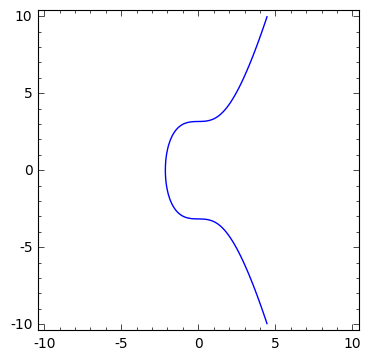

In [5]:
implicit_plot(eq, [x,-10, 10], [y, -10, 10], figsize=5)

### 極値を計算
数式処理システムの可視化の特徴を説明するために、ちょっと面白い関数のグラフを表示してみましょう。

x=0での以下の関数の値はsin(0)が0ですから、0割る0で不定（求まらない）のはずですが、CoCalcでxを$-4\pi$から$4\pi$の範囲でプロットしてみましょう。x=0の値が１となり、とてもなめらかな曲線となっています。

$$
\frac{sin(x)}{x}
$$



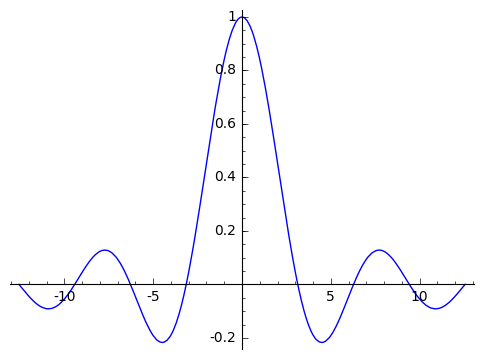

In [6]:
plot(sin(x)/x, [x, -4*pi, 4*pi], figsize=5)

これは、sin(x)/xのx=0の極値を計算しているので、不定値ではなく１の値を正しく計算しています。

変数fにsin(x)/xの式を代入して、limitメソッドを使ってx=0の値を求めてみると、期待通り１となります。

In [7]:
f = sin(x)/x
f.limit(x=0)

1

## 様々なシステムをつなぐ「のり」
CoCalcは、最近AIでよく使われるPythonという言語をベースに作られています。

Pythonには様々なライブラリが揃っています。有名なところでは豊富なデータ分析と可視化機能をもつPandasや多くの機械学習手法を統一したAPIで提供するScikit-learnが挙げられます。

CoCalcは、統計処理システムRや数式や記号処理を得意とするmaximaなどの既存システムをCoCalcのノートブックから使うことができます。ちょうどCoCalcが他のシステムをつなぐ「のり」としての役割をし、CoCalcにない機能を他のシステムで補うことで広範囲の問題に対応することができます。

##### オープンデータの解析
私の住む富山県高岡市でも少しずつ市の情報がオープンデータとして提供されています。
ここでは、Pandas、Scikit-learnを使って平成29年5月の人口データ(h290531.xlsx)の可視化とグループ分けを紹介します。

平成29年5月の人口データは、以下のようのなExcelファイルで提供されています。

<img src="images/Excel_Sheet.png" />

### Pandasを使ってExcelデータを読み込む
最初にpythonのパッケージをimport文を使って利用可能にします。

In [8]:
# python用のパッケージ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import mixture
%matplotlib inline

/usr/lib/sagemath/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


次に、Pandas(pdと省略)のread_excel関数を使ってExcelファイルを読み込みます。
ヘッダは４行目にあり、カラムは2列目から始まっていますので、header=3, index_col=1を指定します。

In [9]:
# 高岡市のオープンデータから平成29年5月の人口データ(h2790531.xlsx)を取り込みます
d = pd.read_excel('data/h290531.xlsx', header=3, index_col=1)
d.head()

,頁,地区 コード,地区名,人 口,Unnamed: 4,Unnamed: 5,世帯数
NaN,NaN,NaN,NaN,男,女,計,NaN
2,NaN,01 平米地区,NaN,1514,1766,3280,1563.0
3,NaN,02 定塚地区,NaN,4370,4855,9225,4006.0
4,NaN,03 下関地区,NaN,4442,4562,9004,4022.0
5,NaN,04 博労地区,NaN,5253,5738,10991,4653.0


地区コードと地区名はセル結合していたり、頁が全てNaNになっているので、少し加工します。

In [10]:
# カラム名を付け直し、最初の5個を表示
d.columns = ['not_used', 'code', 'region', 'male', 'female', 'population', 'household']
# 最初の番号（index）が1より大きなcode, population, householdを抽出します。
d1 = d[d.index > 1][['code', 'male', 'female', 'population', 'household']]
d1.head()

,code,male,female,population,household
2,01 平米地区,1514,1766,3280,1563.0
3,02 定塚地区,4370,4855,9225,4006.0
4,03 下関地区,4442,4562,9004,4022.0
5,04 博労地区,5253,5738,10991,4653.0
6,05 横田地区,2720,2953,5673,2243.0


データが整ったので、男性、女性、世帯数を取り出し、ペアプロットで表示してみましょう。

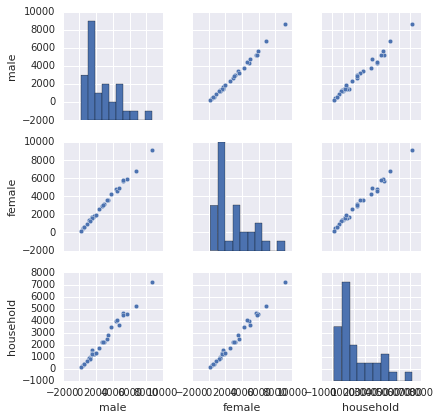

In [11]:
# 男性、女性、人口、世帯数を取り出し、ペアプロットを表示
# N：地区のindexの最大数（合計やその他のデータを除くため）
N = 35
d2 = d[d.index > 1][['male', 'female', 'household']]
d2 = d2[d2.index <=N]

sns.set()
sns.pairplot(d2, size=2)

### グループ分け
分析の例として、高岡市の地区を2つのグループに分けてみましょう。 グループ分けに使用するデータは、男性、女性の人数と世帯数のデータとします。

分析には、Scikit-learnのmixtureパッケージのGaussianMixture（混合ガウスモデル）を使用します。

In [12]:
# GMMを求める
categories = ['male', 'female', 'household']
data = d2[categories].values
# 分類器の生成
classifier = mixture.GaussianMixture(n_components=2, covariance_type='full')
# 混合正規分布を求める
classifier.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

グループ分けの結果をpredにセットし、グループ分けの結果で色分けして、男性、女性の人数と世帯数のペアプロットを表示してみましょう。この結果から、過疎の地域と人口密集地域に分類されることは想定通りなのですが、例外としてぽつんと離れた地区が存在することも分かりました。これだから頭で決めつける前に分析を実行することが大切なのだと実感しました。

In [13]:
# 分類結果をpredにセット
d2['pred'] = classifier.predict(data)

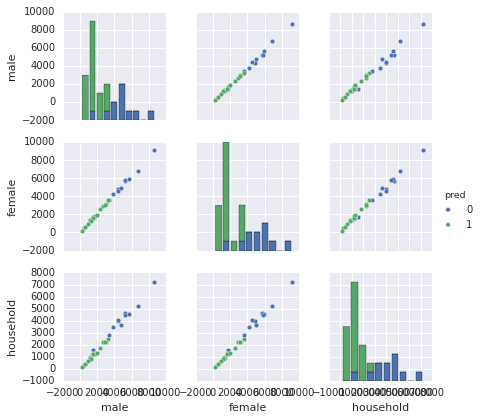

In [14]:
sns.set()
sns.pairplot(d2, size=2, vars=categories, hue='pred')